In [24]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [26]:
data= pd.read_csv("healthcare-dataset-stroke-data.csv")
data.shape

(5110, 12)

In [27]:
data.head(7)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1


In [28]:
# Drop ID column
data.drop('id', axis=1, inplace=True)


In [29]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [30]:
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_1416\620513141.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(data['bmi'].mean(),inplace=True)


In [31]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [49]:
label_encoders= {}
catogorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in catogorical_columns:
    le = LabelEncoder()
    data[col]= le.fit_transform(data[col])
    label_encoders[col] = le

In [33]:
X = data.drop('stroke', axis=1)
y = data['stroke']


In [37]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [41]:
X_scaled

array([[ 1.18807255e+00,  1.05143428e+00, -3.28601864e-01, ...,
         2.70637544e+00,  1.00123401e+00, -3.51780710e-01],
       [-8.40343999e-01,  7.86070073e-01, -3.28601864e-01, ...,
         2.12155854e+00,  4.61555355e-16,  5.81552327e-01],
       [ 1.18807255e+00,  1.62639008e+00, -3.28601864e-01, ...,
        -5.02830130e-03,  4.68577254e-01,  5.81552327e-01],
       ...,
       [-8.40343999e-01, -3.63841511e-01, -3.28601864e-01, ...,
        -5.11442636e-01,  2.21736316e-01,  5.81552327e-01],
       [ 1.18807255e+00,  3.43796387e-01, -3.28601864e-01, ...,
         1.32825706e+00, -4.27845098e-01, -3.51780710e-01],
       [-8.40343999e-01,  3.42048064e-02, -3.28601864e-01, ...,
        -4.60867458e-01, -3.49895329e-01, -1.28511375e+00]],
      shape=(5110, 10))

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [43]:
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [44]:
y_pred = model.predict(X_test)

print("\n✅ Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))



✅ Accuracy Score: 0.9500978473581213

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



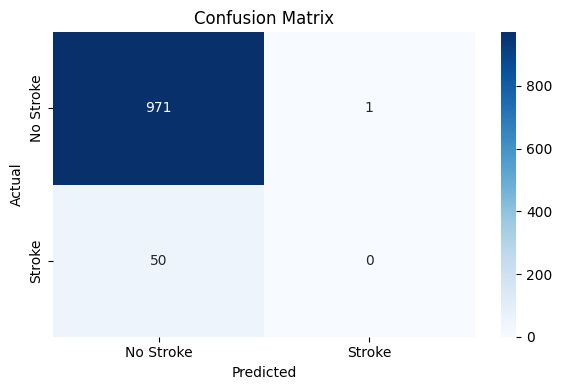

In [45]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_1416\2523125909.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')


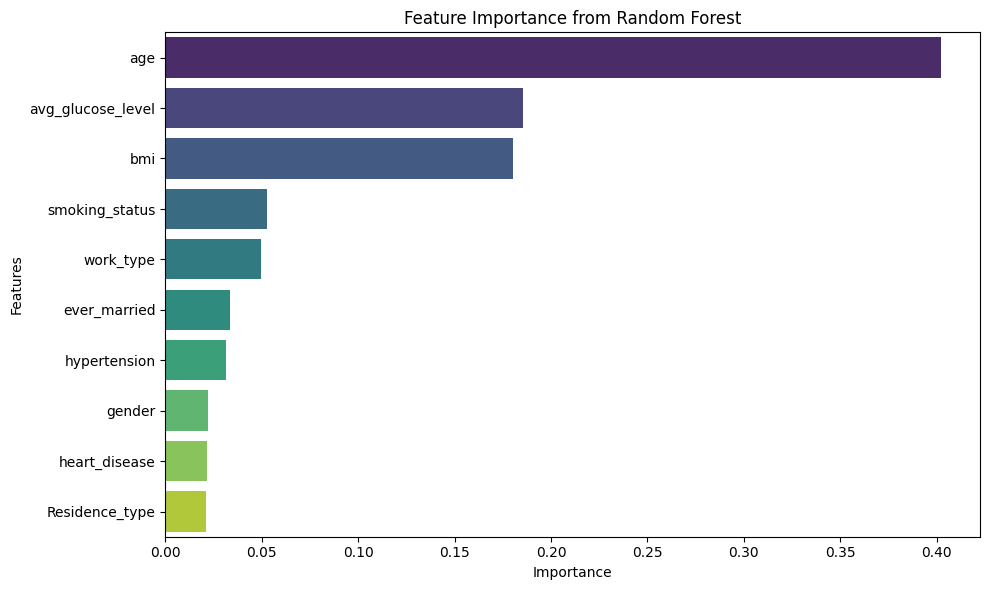

In [46]:
importances = model.feature_importances_
feature_names = X.columns
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_df, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [48]:
import joblib

# Save model and scaler
joblib.dump(model, 'stroke_model.pkl')
joblib.dump(scaler, 'scaler.pkl')




['scaler.pkl']

In [50]:
joblib.dump(label_encoders, 'label_encoders.pkl')

['label_encoders.pkl']